<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Smoker Status using Bio-Signals</h1>
</div>

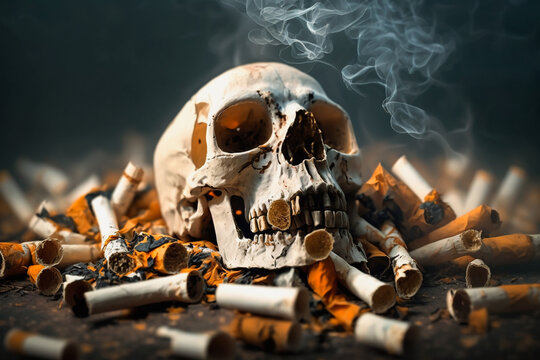

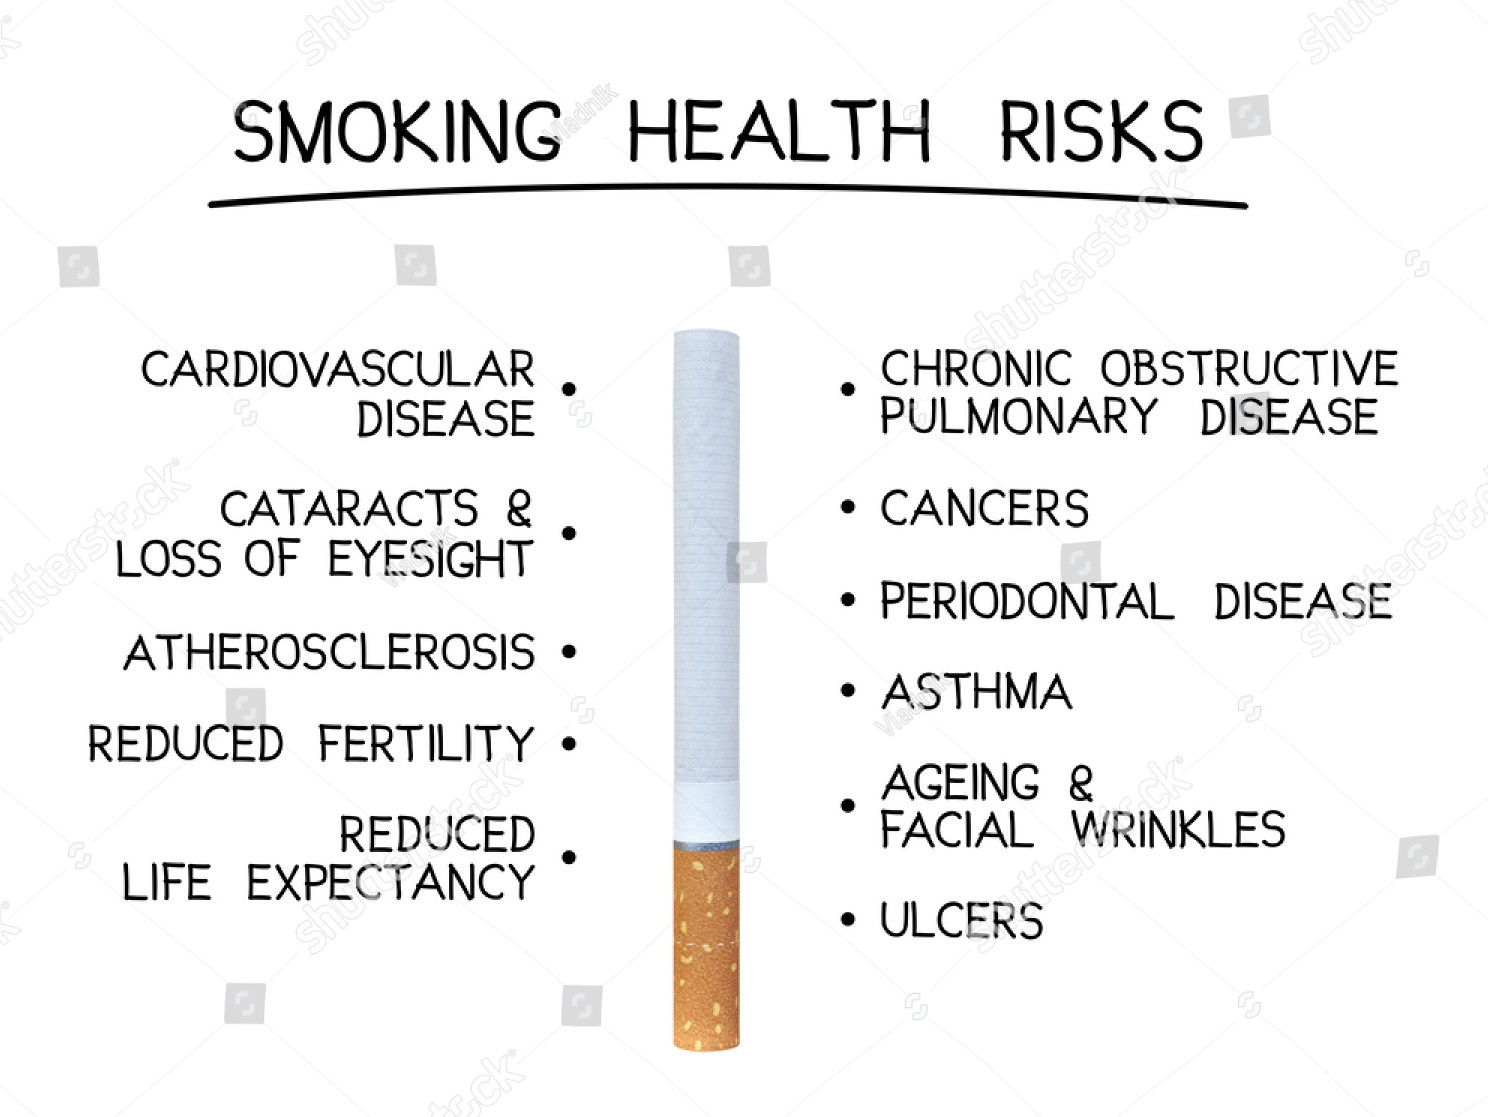

**Author:-** Aniket B. Barphe
    
**LinkedIn Profile:-** https://www.linkedin.com/in/aniiketbarphe/
        
**Platform:-** AI Planet (https://aiplanet.com/)
    
**Problem Statement:-** Build a machine learning-based approach to predict the Smoker Status using Bio-Signals

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [108]:
# Data manipulation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import loguniform
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

# Model Evaluations
import sklearn as sk
from sklearn.utils.class_weight import compute_class_weight
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))

# User Defined Functions

# a) BoxPlot:- To check Outliers
def Create_BoxPlotS(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, Feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.boxplot(DataFrame[Feature],ax=ax)   
    fig.tight_layout()  
    plt.show()
    
# b) DistPlot:- To check Normality
def Create_DistPlots(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.distplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()

# c) Univariate Analysis of Catagorical Variables
def Univariate_Cat_Features(DataFrame, Features, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.countplot(DataFrame[feature],ax=ax)    
    fig.tight_layout()  
    plt.show()
    
# d) Scatter Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_ScatterPlots(DataFrame, Features, Target_Variable, Rows, Columns):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        ax=fig.add_subplot(Rows,Columns,i+1)
        sns.scatterplot(DataFrame[feature],DataFrame[Target_Variable],ax=ax)  
    fig.tight_layout()  
    plt.show()

# e) Joint Plot:- Bivariate Analysis between Target Variable & Independent Variables
# Note:- Pass Target_Variable in Single Quote in this function
def Create_JointPlots(DataFrame, Features, Target_Variable):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(Features[0:]):
        sns.jointplot(y= Target_Variable, x= DataFrame[feature], data = DataFrame,kind='reg')
    fig.tight_layout()  
    plt.show()

# f) Check Feature wise Outliers   
def Check_Outliers(DataFrame, Column_List):
    for column in Column_List:    
        q1 = DataFrame[column].quantile(0.25)    # First Quartile
        q3 = DataFrame[column].quantile(0.75)    # Third Quartile
        IQR = q3 - q1                            # Inter Quartile Range
        llimit = q1 - 1.5*IQR                    # Lower Limit
        ulimit = q3 + 1.5*IQR                    # Upper Limit
        outliers = DataFrame[(DataFrame[column] < llimit) | (DataFrame[column] > ulimit)]
        print('\nNumber of outliers in "' + column + '" :' + str(len(outliers)))
        print('\nLower Limit in "' + column + '" :',llimit)
        print('\nUpper Limit in "' + column + '" :',ulimit)
        print('\nInter Quartile Range of "' + column + '" :',IQR,"\n")

# g) Label Encoding   
def Label_Encoder(DataFrame):
    le = LabelEncoder()
    for col in DataFrame.columns:
        if(DataFrame[col].dtype == 'object'):
            DataFrame.loc[:,col] = le.fit_transform(DataFrame.loc[:,col])

CatBoost version 1.2
NumPy version 1.21.5
Pandas version 1.4.2
seaborn version 0.11.2
sklearn version 1.3.0
xgboost version 1.7.6
lightgbm version 3.3.5


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable

In [109]:
train = pd.read_csv(r'C:\Users\AniketBarphe\Favorites\AB\Apnet\SSP\train_dataset.csv')
test = pd.read_csv(r'C:\Users\AniketBarphe\Favorites\AB\Apnet\SSP\test_dataset.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 
- Check Unique Entries in Train Dataset 
- Check Unique Entries in Test Dataset

In [110]:
print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglob

In [111]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

About Train Data:-

   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0    

In [112]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

About Train Data:-

       age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
38979   40         165          60       80.0             0.4   
38980   45         155          55       75.0             1.5   
38981   40         170         105      124.0             0.6   
38982   40         160          55       75.0             1.5   
38983   55         175          60       81.1             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
38979              0.6              1               1       107          60   
38980              1.2              1               1       126          72   
38981              0.5              1               1       141          85   
38982              1.5              1               1        95          69   
38983              1.0              1               1       114          66   

       ...  HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  \
38979  ...   61   72        12.3   

In [113]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38984.000000  38984.000000  38984.000000  38984.000000    38984.000000   
mean      44.127591    164.689488     65.938718     82.062115        1.014955   
std       12.063564      9.187507     12.896581      9.326798        0.498527   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     38984.000000   38984.000000    38984.000000  38984.000000   
mean          1.008768       1.025369        1.026190    121.475631   
std           0.493813       0.157246        0.159703     13.643521   
min           0.100000       1.000000        1.000000     71.000000   
25%           0.800000       1.000000        1.000000    112.000000   
50%           1.000000       1.000000        1.000000    120.000000   
75%           1.200000       1.000000        1.000000    130.000000   
max           9.900000       2.000000        2.000000    233.000000   

         relaxation  ...           HDL           LDL    hemoglobin  \
count  38984.000000  ...  38984.000000  38984.000000  38984.000000   
mean      75.994408  ...     57.293146    115.081495     14.624264   
std        9.658734  ...     14.617822     42.883163      1.566528   
min       40.000000  ...      4.000000      1.000000      4.900000   
25%       70.000000  ...     47.000000     91.000000     13.600000   
50%       76.000000  ...     55.000000    113.000000     14.800000   
75%       82.000000  ...     66.000000    136.000000     15.800000   
max      146.000000  ...    359.000000   1860.000000     21.100000   

       Urine protein  serum creatinine           AST           ALT  \
count   38984.000000      38984.000000  38984.000000  38984.000000   
mean        1.086523          0.886030     26.198235     27.145188   
std         0.402107          0.220621     19.175595     31.309945   
min         1.000000          0.100000      6.000000      1.000000   
25%         1.000000          0.800000     19.000000     15.000000   
50%         1.000000          0.900000     23.000000     21.000000   
75%         1.000000          1.000000     29.000000     31.000000   
max         6.000000         11.600000   1090.000000   2914.000000   

                Gtp  dental caries       smoking  
count  38984.000000   38984.000000  38984.000000  
mean      39.905038       0.214421      0.367279  
std       49.693843       0.410426      0.482070  
min        2.000000       0.000000      0.000000  
25%       17.000000       0.000000      0.000000  
50%       26.000000       0.000000      0.000000  
75%       44.000000       0.000000      1.000000  
max      999.000000       1.000000      1.000000  

[8 rows x 23 columns]

In [114]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  16708.000000  16708.000000  16708.000000  16708.000000    16708.000000   
mean      44.312006    164.555602     65.692782     82.009792        1.007182   
std       12.089099      9.210712     12.639255      9.150549        0.458500   
min       20.000000    135.000000     30.000000     53.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    125.000000    125.800000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     16708.000000   16708.000000    16708.000000  16708.000000   
mean          1.004351       1.026095        1.026035    121.537587   
std           0.467140       0.159423        0.159245     13.751759   
min           0.100000       1.000000        1.000000     79.000000   
25%           0.800000       1.000000        1.000000    112.000000   
50%           1.000000       1.000000        1.000000    120.000000   
75%           1.200000       1.000000        1.000000    130.000000   
max           9.900000       2.000000        2.000000    240.000000   

         relaxation  ...  triglyceride           HDL           LDL  \
count  16708.000000  ...  16708.000000  16708.000000  16708.000000   
mean      76.029148  ...    126.470254     57.283816    114.691525   
std        9.727289  ...     71.259041     15.018255     35.948974   
min       40.000000  ...     16.000000      4.000000      1.000000   
25%       70.000000  ...     74.000000     47.000000     92.000000   
50%       76.000000  ...    107.000000     55.000000    113.000000   
75%       82.000000  ...    160.000000     66.000000    136.000000   
max      140.000000  ...    405.000000    618.000000   1660.000000   

         hemoglobin  Urine protein  serum creatinine           AST  \
count  16708.000000   16708.000000      16708.000000  16708.000000   
mean      14.618692       1.088820          0.885055     26.147235   
std        1.559794       0.411293          0.223621     19.769301   
min        4.900000       1.000000          0.100000      6.000000   
25%       13.600000       1.000000          0.800000     19.000000   
50%       14.800000       1.000000          0.900000     23.000000   
75%       15.800000       1.000000          1.000000     28.000000   
max       20.900000       6.000000         10.300000   1311.000000   

                ALT           Gtp  dental caries  
count  16708.000000  16708.000000   16708.000000  
mean      26.781362     40.062246       0.210797  
std       30.085442     51.657330       0.407887  
min        1.000000      1.000000       0.000000  
25%       15.000000     17.000000       0.000000  
50%       21.000000     25.000000       0.000000  
75%       30.000000     43.000000       0.000000  
max     2062.000000    999.000000       1.000000  

[8 rows x 22 columns]

In [115]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum()
                                   ,train.isnull().sum()*100/len(train))
                               ,columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




Missing Values  Percentage Missing Values
age                               0                        0.0
height(cm)                        0                        0.0
weight(kg)                        0                        0.0
waist(cm)                         0                        0.0
eyesight(left)                    0                        0.0
eyesight(right)                   0                        0.0
hearing(left)                     0                        0.0
hearing(right)                    0                        0.0
systolic                          0                        0.0
relaxation                        0                        0.0
fasting blood sugar               0                        0.0
Cholesterol                       0                        0.0
triglyceride                      0                        0.0
HDL                               0                        0.0
LDL                               0                        0.0
hemoglobin                        0                        0.0
Urine protein                     0                        0.0
serum creatinine                  0                        0.0
AST                               0                        0.0
ALT                               0                        0.0
Gtp                               0                        0.0
dental caries                     0                        0.0
smoking                           0                        0.0

In [116]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum()
                                  ,test.isnull().sum()*100/len(test))
                              ,columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




Missing Values  Percentage Missing Values
age                               0                        0.0
height(cm)                        0                        0.0
weight(kg)                        0                        0.0
waist(cm)                         0                        0.0
eyesight(left)                    0                        0.0
eyesight(right)                   0                        0.0
hearing(left)                     0                        0.0
hearing(right)                    0                        0.0
systolic                          0                        0.0
relaxation                        0                        0.0
fasting blood sugar               0                        0.0
Cholesterol                       0                        0.0
triglyceride                      0                        0.0
HDL                               0                        0.0
LDL                               0                        0.0
hemoglobin                        0                        0.0
Urine protein                     0                        0.0
serum creatinine                  0                        0.0
AST                               0                        0.0
ALT                               0                        0.0
Gtp                               0                        0.0
dental caries                     0                        0.0

In [117]:
# Checking Unique entries in Train Data
listItem = []
for col in train.columns :
    listItem.append( [col, train[col].nunique(), train[col].unique()])

train_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Train Data are :-\n\n")
print('-------------'*9)
train_unique

Unique entries in Train Data are :-


---------------------------------------------------------------------------------------------------------------------


Column_Name  Number_of_Unique_Values  \
0                   age                       14   
1            height(cm)                       13   
2            weight(kg)                       22   
3             waist(cm)                      545   
4        eyesight(left)                       19   
5       eyesight(right)                       17   
6         hearing(left)                        2   
7        hearing(right)                        2   
8              systolic                      125   
9            relaxation                       94   
10  fasting blood sugar                      258   
11          Cholesterol                      279   
12         triglyceride                      389   
13                  HDL                      122   
14                  LDL                      286   
15           hemoglobin                      143   
16        Urine protein                        6   
17     serum creatinine                       34   
18                  AST                      195   
19                  ALT                      230   
20                  Gtp                      439   
21        dental caries                        2   
22              smoking                        2   

                                        Unique_Sample  
0   [35, 20, 45, 60, 40, 50, 75, 55, 25, 30, 70, 6...  
1   [170, 175, 155, 165, 160, 180, 150, 140, 145, ...  
2   [85, 110, 65, 80, 60, 50, 90, 75, 55, 40, 70, ...  
3   [97.0, 110.0, 86.0, 94.0, 81.0, 78.0, 95.0, 85...  
4   [0.9, 0.7, 0.8, 1.5, 1.0, 1.2, 0.5, 0.3, 0.4, ...  
5   [0.9, 0.7, 0.1, 1.0, 1.5, 0.5, 0.8, 1.2, 0.4, ...  
6                                              [1, 2]  
7                                              [1, 2]  
8   [118, 119, 110, 158, 109, 126, 130, 89, 114, 1...  
9   [78, 79, 80, 88, 64, 75, 60, 57, 81, 76, 68, 7...  
10  [97, 88, 80, 249, 100, 114, 90, 83, 96, 94, 86...  
11  [239, 211, 193, 210, 179, 177, 207, 170, 178, ...  
12  [153, 128, 120, 366, 200, 74, 331, 62, 69, 177...  
13  [70, 71, 57, 46, 47, 98, 39, 58, 60, 41, 63, 5...  
14  [142, 114, 112, 91, 92, 64, 102, 99, 104, 107,...  
15  [19.8, 15.9, 13.7, 16.9, 14.9, 13.9, 16.5, 14....  
16                                 [1, 3, 2, 5, 4, 6]  
17  [1.0, 1.1, 0.6, 0.9, 1.2, 1.4, 0.7, 0.5, 0.8, ...  
18  [61, 19, 1090, 32, 26, 47, 29, 17, 22, 23, 24,...  
19  [115, 25, 1400, 36, 28, 23, 22, 20, 17, 15, 13...  
20  [125, 30, 276, 36, 15, 70, 19, 32, 14, 56, 9, ...  
21                                             [1, 0]  
22                                             [1, 0]

In [118]:
# Checking Unique entries in Test Data
listItem = []
for col in test.columns :
    listItem.append( [col, test[col].nunique(), test[col].unique()])

test_unique = pd.DataFrame(columns=['Column_Name', 'Number_of_Unique_Values', 'Unique_Sample'],
                     data=listItem)
print("Unique entries in Test Data are :-\n\n")
print('-------------'*9)
test_unique

Unique entries in Test Data are :-


---------------------------------------------------------------------------------------------------------------------


Column_Name  Number_of_Unique_Values  \
0                   age                       14   
1            height(cm)                       12   
2            weight(kg)                       20   
3             waist(cm)                      483   
4        eyesight(left)                       18   
5       eyesight(right)                       16   
6         hearing(left)                        2   
7        hearing(right)                        2   
8              systolic                      114   
9            relaxation                       81   
10  fasting blood sugar                      221   
11          Cholesterol                      251   
12         triglyceride                      383   
13                  HDL                      113   
14                  LDL                      235   
15           hemoglobin                      130   
16        Urine protein                        6   
17     serum creatinine                       25   
18                  AST                      161   
19                  ALT                      195   
20                  Gtp                      358   
21        dental caries                        2   

                                        Unique_Sample  
0   [40, 45, 30, 60, 55, 75, 50, 20, 25, 70, 35, 8...  
1   [170, 180, 175, 160, 145, 165, 155, 150, 185, ...  
2   [65, 75, 90, 50, 60, 55, 85, 80, 45, 70, 95, 4...  
3   [75.1, 89.0, 94.0, 73.0, 78.0, 75.0, 69.0, 80....  
4   [1.0, 0.7, 0.5, 1.5, 1.2, 0.8, 0.4, 0.9, 0.2, ...  
5   [0.9, 1.2, 0.8, 0.7, 1.0, 1.5, 0.5, 0.3, 0.4, ...  
6                                              [1, 2]  
7                                              [1, 2]  
8   [120, 100, 115, 118, 110, 112, 137, 148, 131, ...  
9   [70, 67, 72, 78, 64, 89, 87, 86, 85, 90, 65, 7...  
10  [102, 96, 88, 86, 87, 93, 90, 80, 121, 154, 82...  
11  [225, 258, 177, 187, 190, 186, 199, 176, 192, ...  
12  [260, 345, 103, 70, 210, 80, 68, 35, 36, 109, ...  
13  [41, 49, 53, 65, 45, 86, 78, 68, 67, 81, 66, 8...  
14  [132, 140, 103, 108, 84, 85, 124, 102, 89, 92,...  
15  [15.7, 13.5, 14.1, 14.7, 15.4, 12.4, 16.0, 13....  
16                                 [1, 3, 2, 4, 5, 6]  
17  [0.8, 1.1, 1.0, 1.3, 0.5, 0.7, 0.6, 0.9, 0.4, ...  
18  [24, 26, 19, 31, 21, 39, 15, 23, 28, 34, 20, 2...  
19  [26, 28, 29, 21, 20, 9, 19, 14, 24, 40, 18, 11...  
20  [32, 138, 30, 33, 19, 35, 14, 17, 13, 54, 10, ...  
21                                             [0, 1]

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


In [119]:
# Segregation of Numerical Columns from Train Data
num_cols_train = train.select_dtypes(['int64','float64']).columns
print("Shape of Numerical Features in Train data is:-\n\n",num_cols_train.shape)
print("Numerical Columns in Train Data are :-\n\n")
print(num_cols_train)
print('-------------'*9)

# Segregation of Catagorical Columns from Train Data
cat_cols_train = train.select_dtypes(['object']).columns
print("Catagorical Columns in Train Data are :-\n\n")
print(cat_cols_train)
print('-------------'*9)

Shape of Numerical Features in Train data is:-

 (23,)
Numerical Columns in Train Data are :-


Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')
---------------------------------------------------------------------------------------------------------------------
Catagorical Columns in Train Data are :-


Index([], dtype='object')
---------------------------------------------------------------------------------------------------------------------


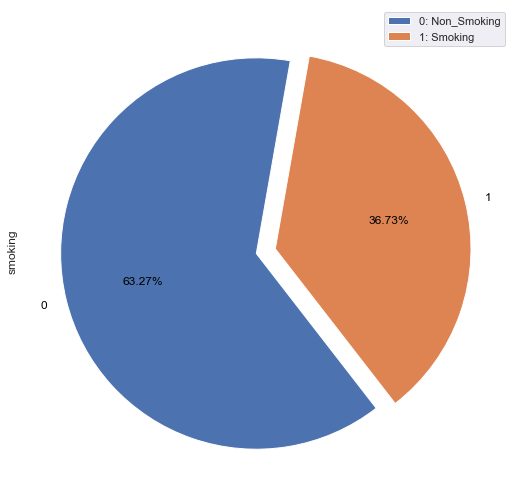

In [120]:
# Check the distribution of Target variable to see if it's a case of unbalanced class
train.smoking.value_counts().plot(kind='pie', subplots=True
                                            , autopct='%1.2f%%', explode= (0.05, 0.05)
                                            , startangle=80, legend=True, fontsize=12
                                            , figsize=(14,9), textprops={'color':"black"})
plt.legend(["0: Non_Smoking","1: Smoking"]);

In [121]:
y_original = train['smoking']
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_original), y=y_original)
print("Class Weights:", class_weights)

Class Weights: [0.79023757 1.36136332]


In [122]:
# Check Outliers in the Train Dataset
Check_Outliers(train,num_cols_train)


Number of outliers in "age" :211

Lower Limit in "age" : 17.5

Upper Limit in "age" : 77.5

Inter Quartile Range of "age" : 15.0 


Number of outliers in "height(cm)" :177

Lower Limit in "height(cm)" : 145.0

Upper Limit in "height(cm)" : 185.0

Inter Quartile Range of "height(cm)" : 10.0 


Number of outliers in "weight(kg)" :146

Lower Limit in "weight(kg)" : 25.0

Upper Limit in "weight(kg)" : 105.0

Inter Quartile Range of "weight(kg)" : 20.0 


Number of outliers in "waist(cm)" :377

Lower Limit in "waist(cm)" : 58.0

Upper Limit in "waist(cm)" : 106.0

Inter Quartile Range of "waist(cm)" : 12.0 


Number of outliers in "eyesight(left)" :921

Lower Limit in "eyesight(left)" : 0.20000000000000018

Upper Limit in "eyesight(left)" : 1.7999999999999998

Inter Quartile Range of "eyesight(left)" : 0.3999999999999999 


Number of outliers in "eyesight(right)" :950

Lower Limit in "eyesight(right)" : 0.20000000000000018

Upper Limit in "eyesight(right)" : 1.7999999999999998

Inter Quart

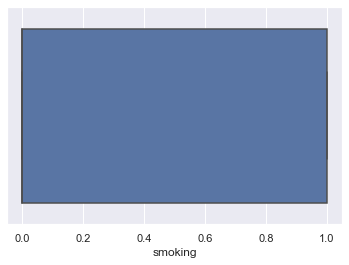

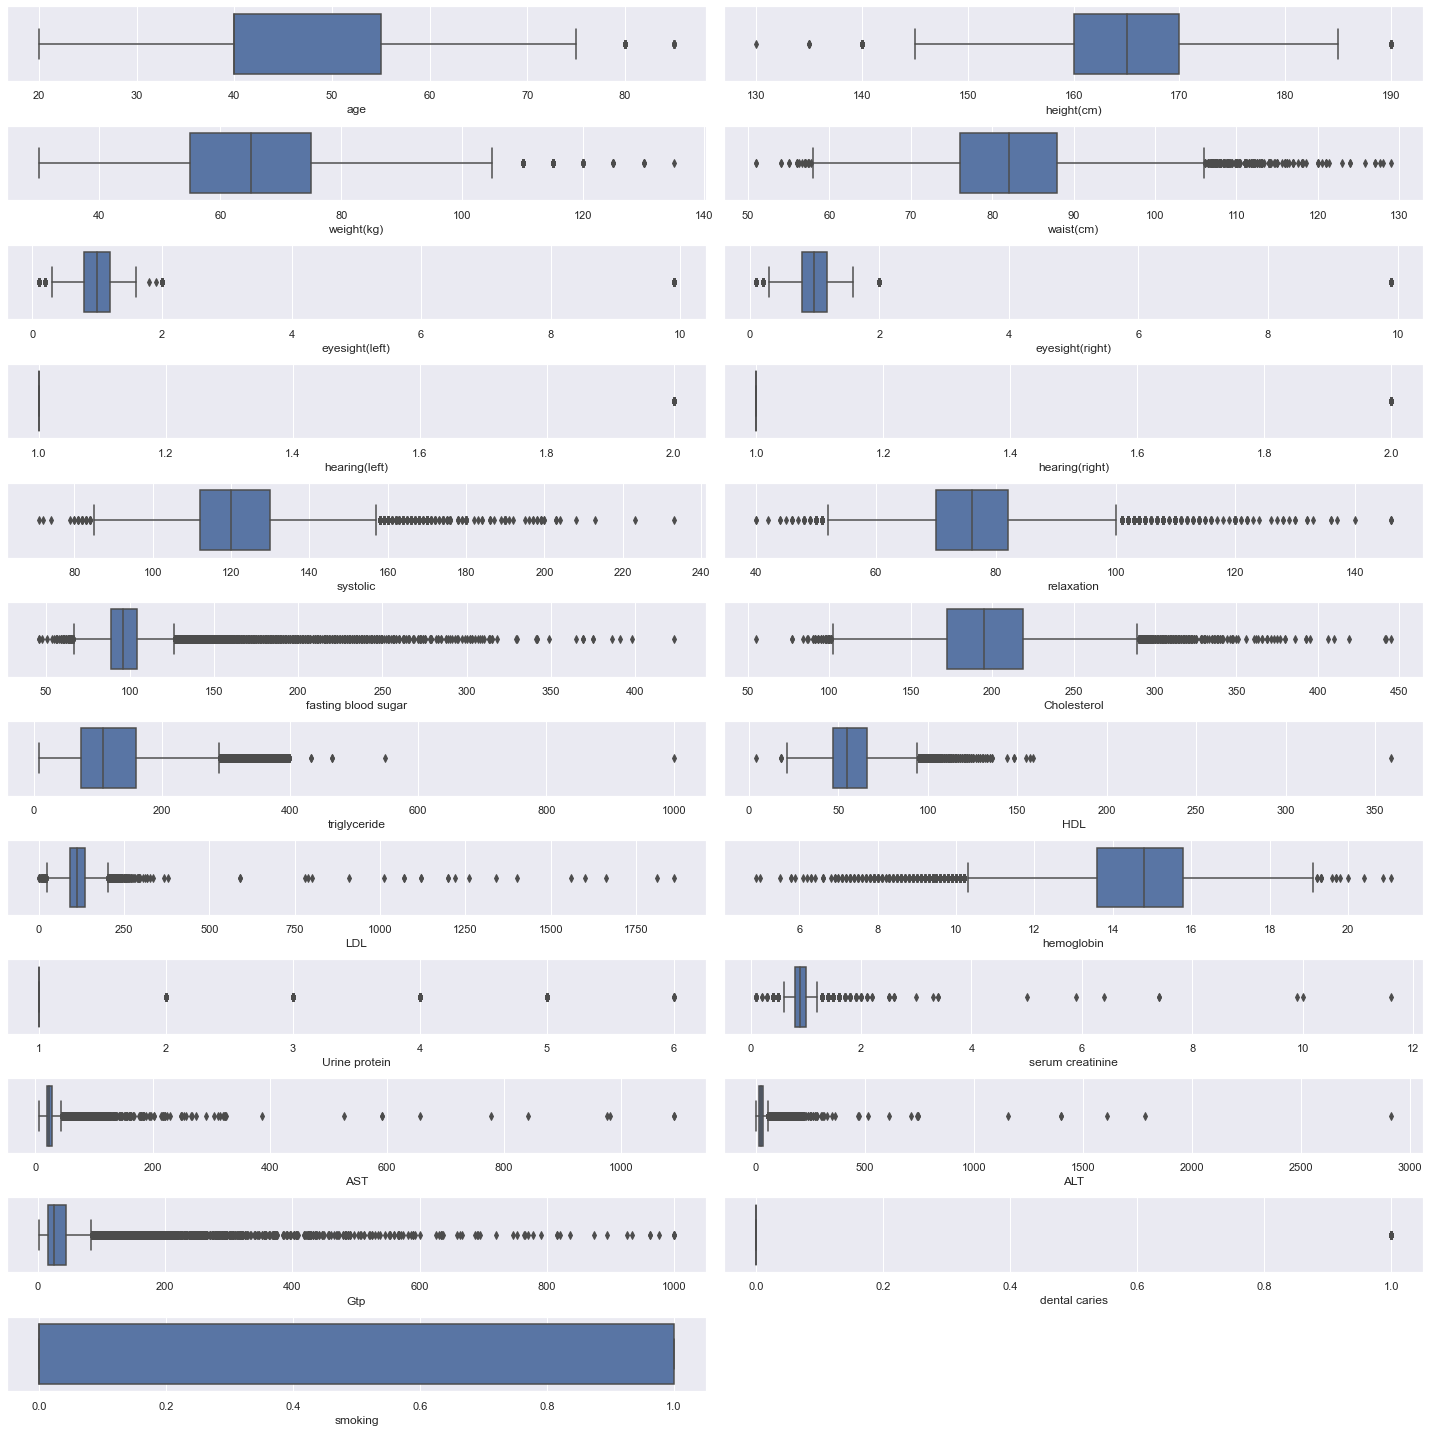

In [123]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Outliers)

# Dependent Numerical Variable
sns.boxplot(train['smoking']);

# Independent Numerical Variable
Create_BoxPlotS(train,num_cols_train,12,2)

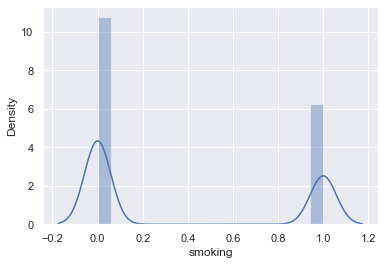

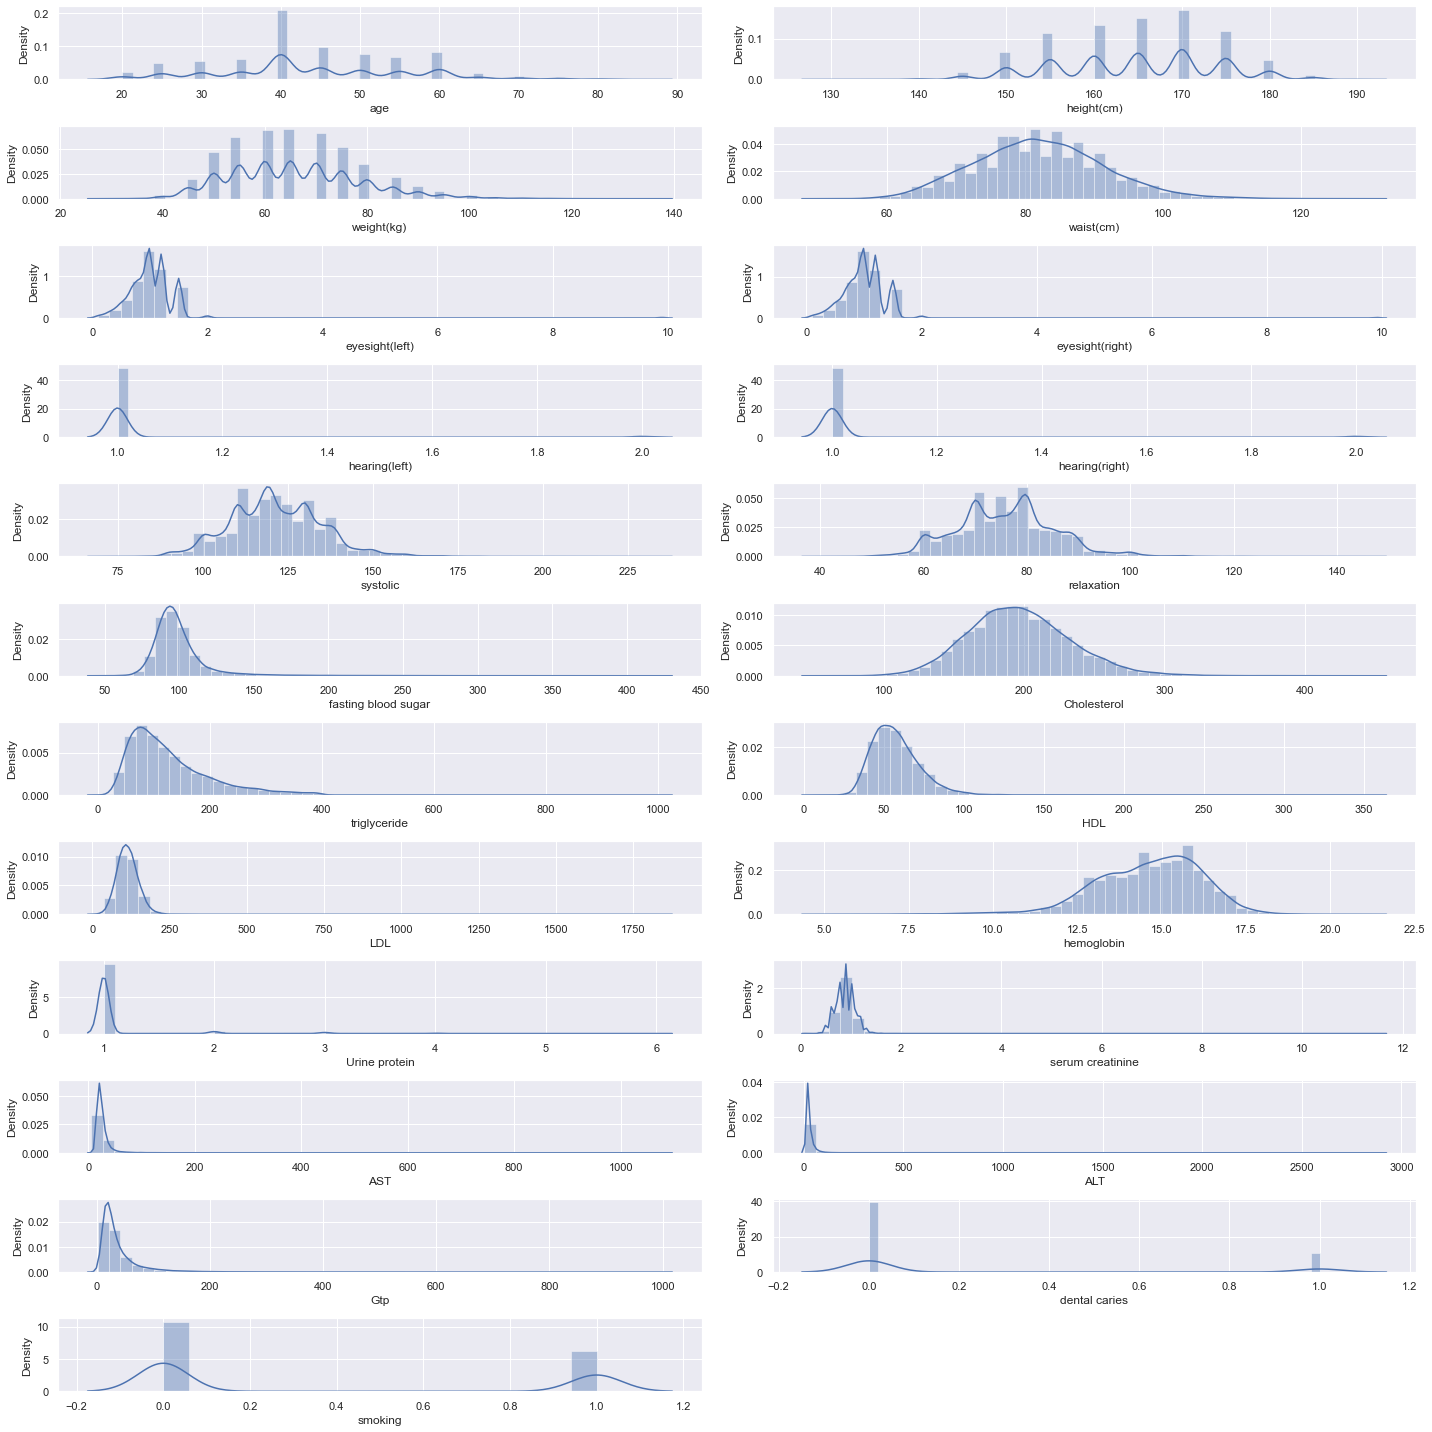

In [124]:
# Univariate Analysis of Numerical Variables Train DataSet (Check Normality)

# Dependent Numerical Variable
sns.distplot(train['smoking']);

# Independent Numerical Variable
Create_DistPlots(train,num_cols_train,12,2)

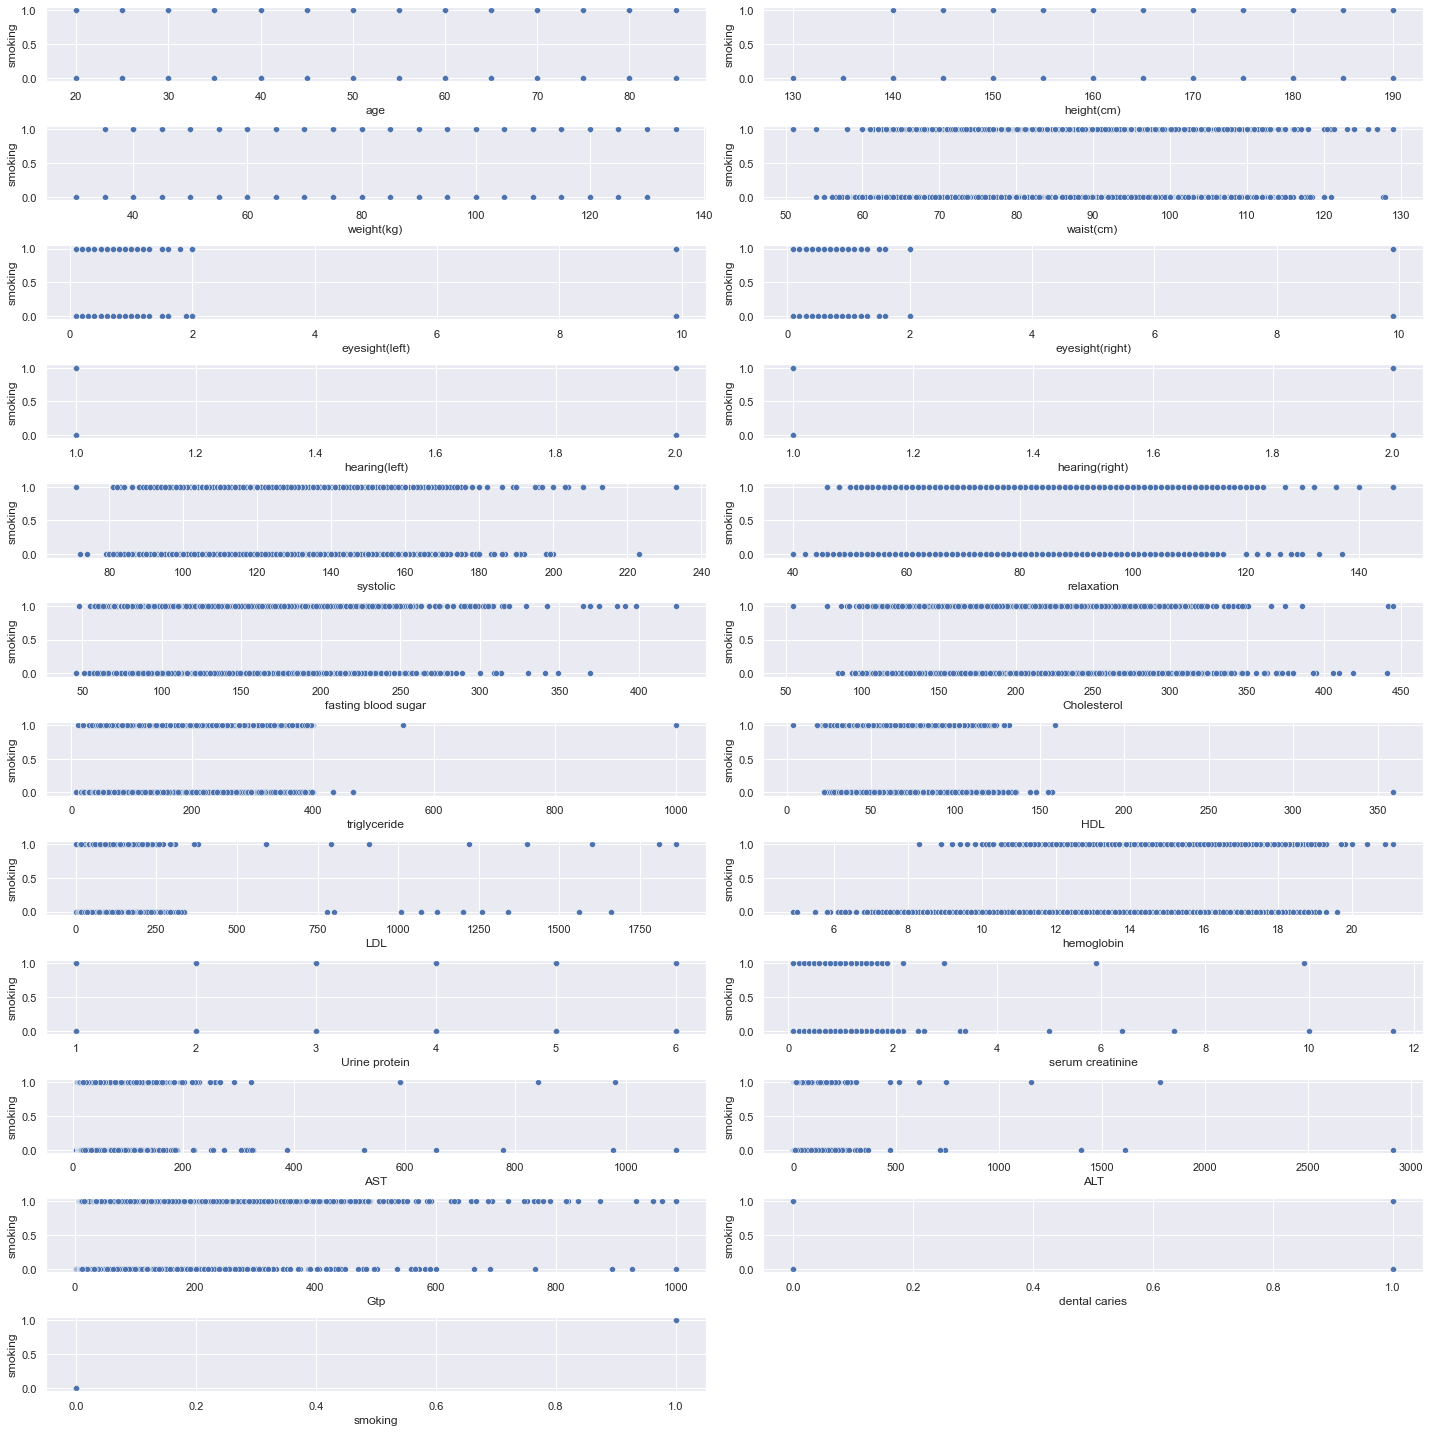

In [125]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_ScatterPlots(train,num_cols_train,'smoking',12,2)

<Figure size 1440x1440 with 0 Axes>

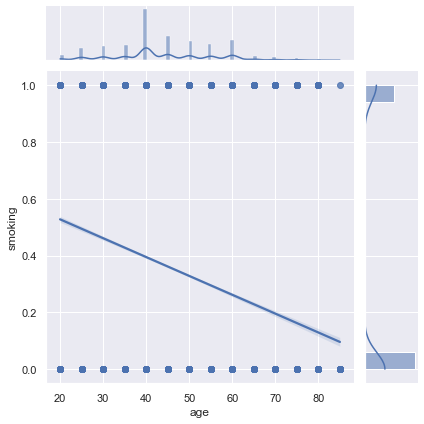

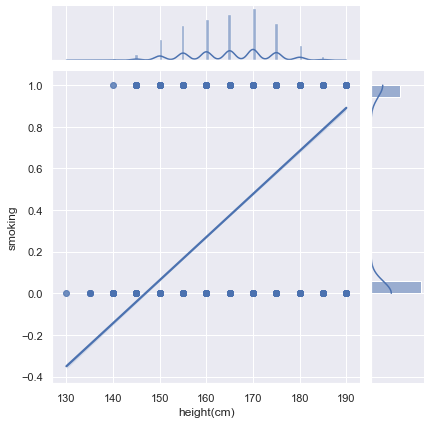

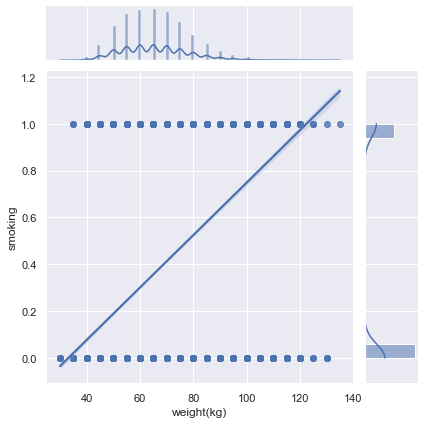

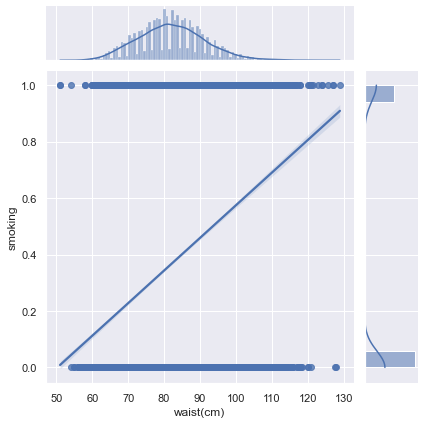

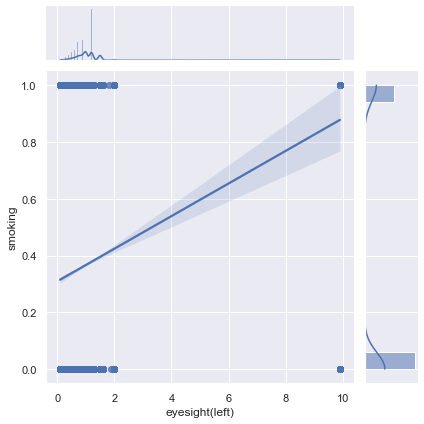

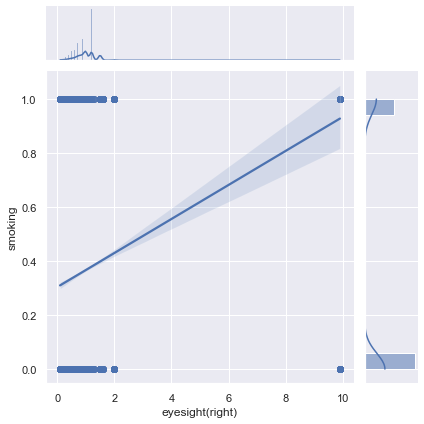

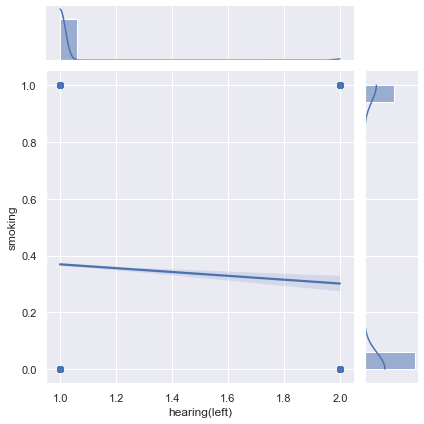

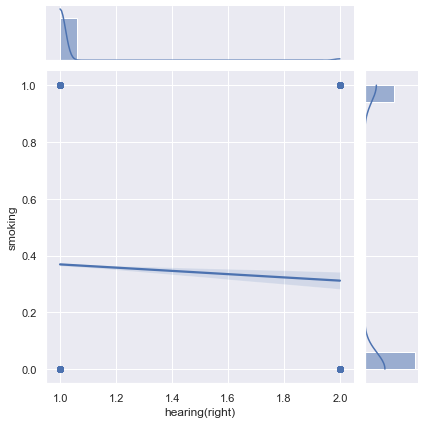

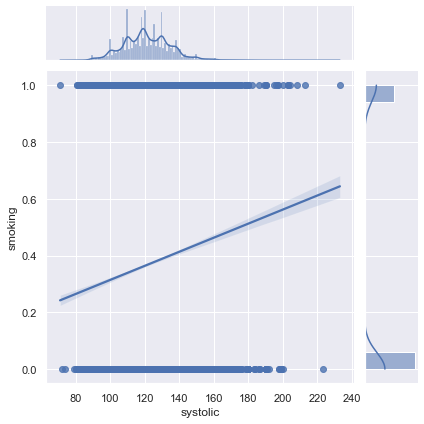

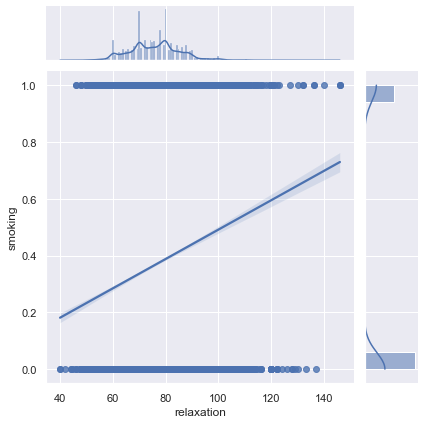

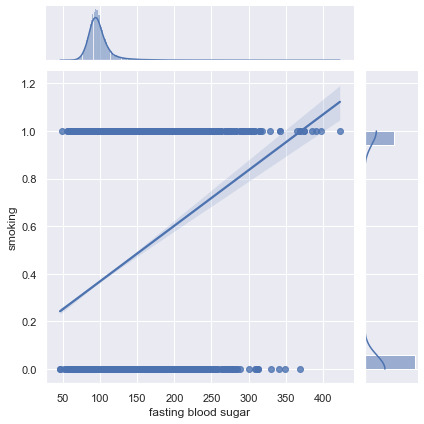

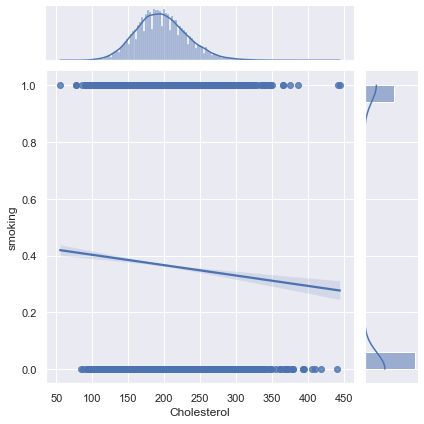

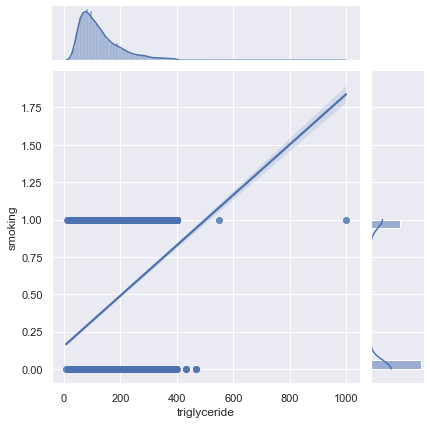

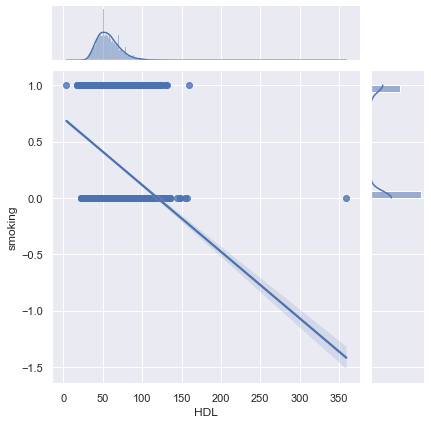

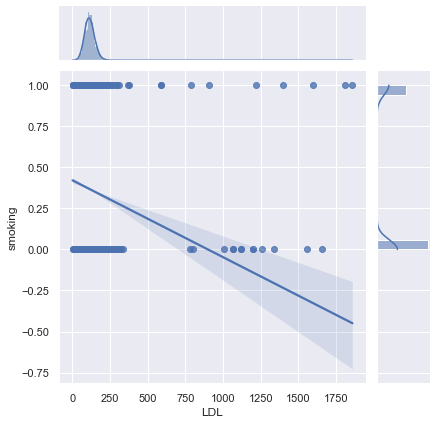

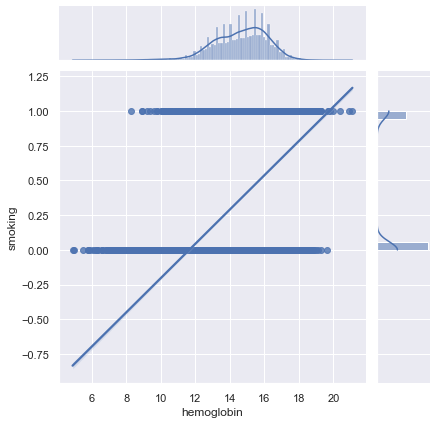

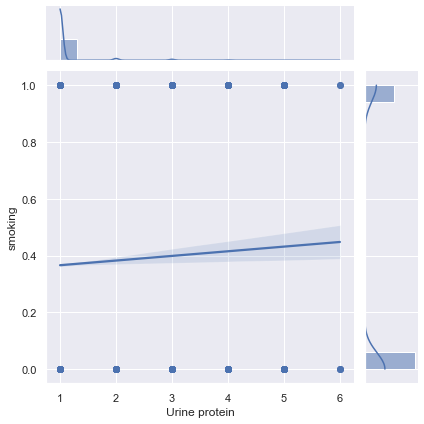

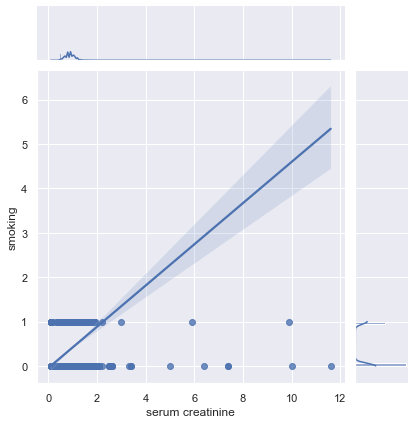

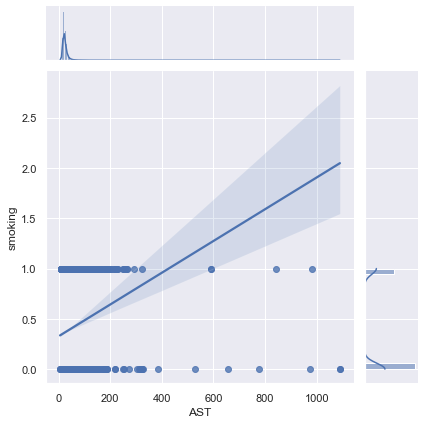

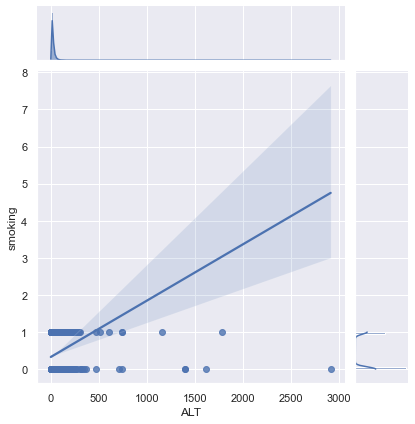

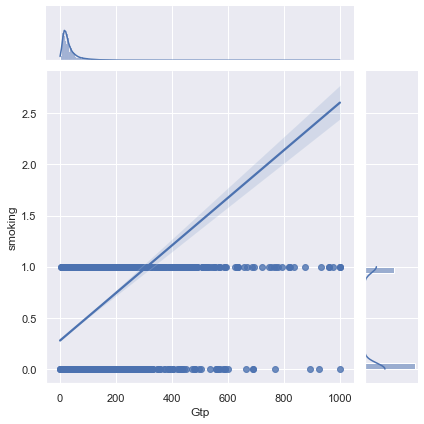

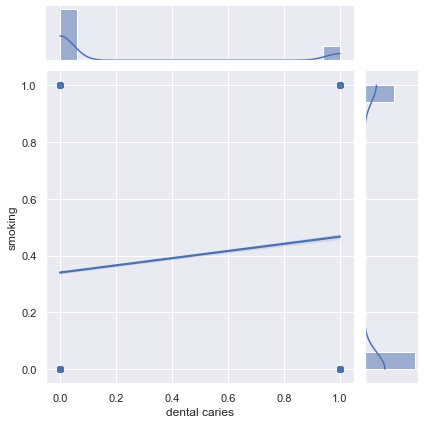

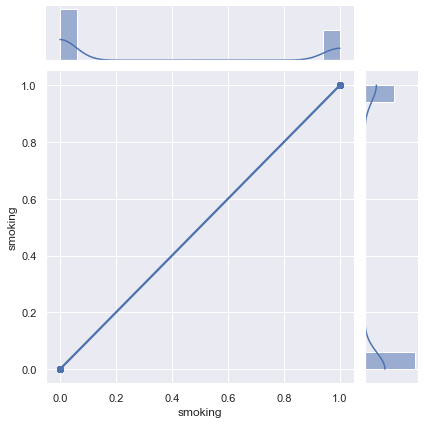

In [126]:
# Bivariate Analysis between Target Variable & Independent Variables(Numerical Variables) 
Create_JointPlots(train,num_cols_train,'smoking');

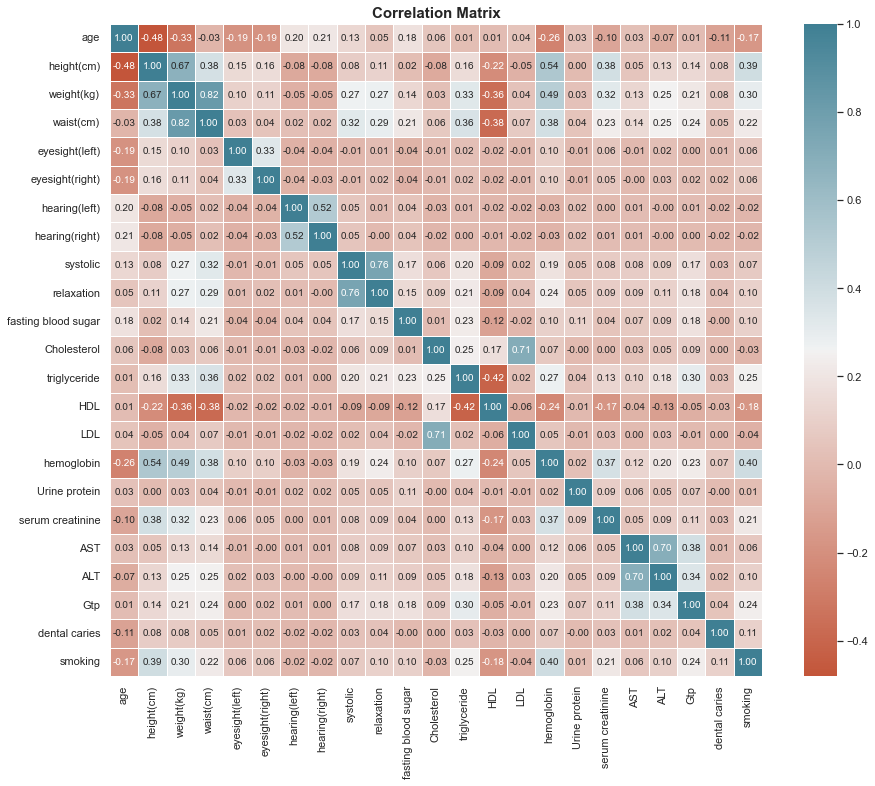

In [127]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = train.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

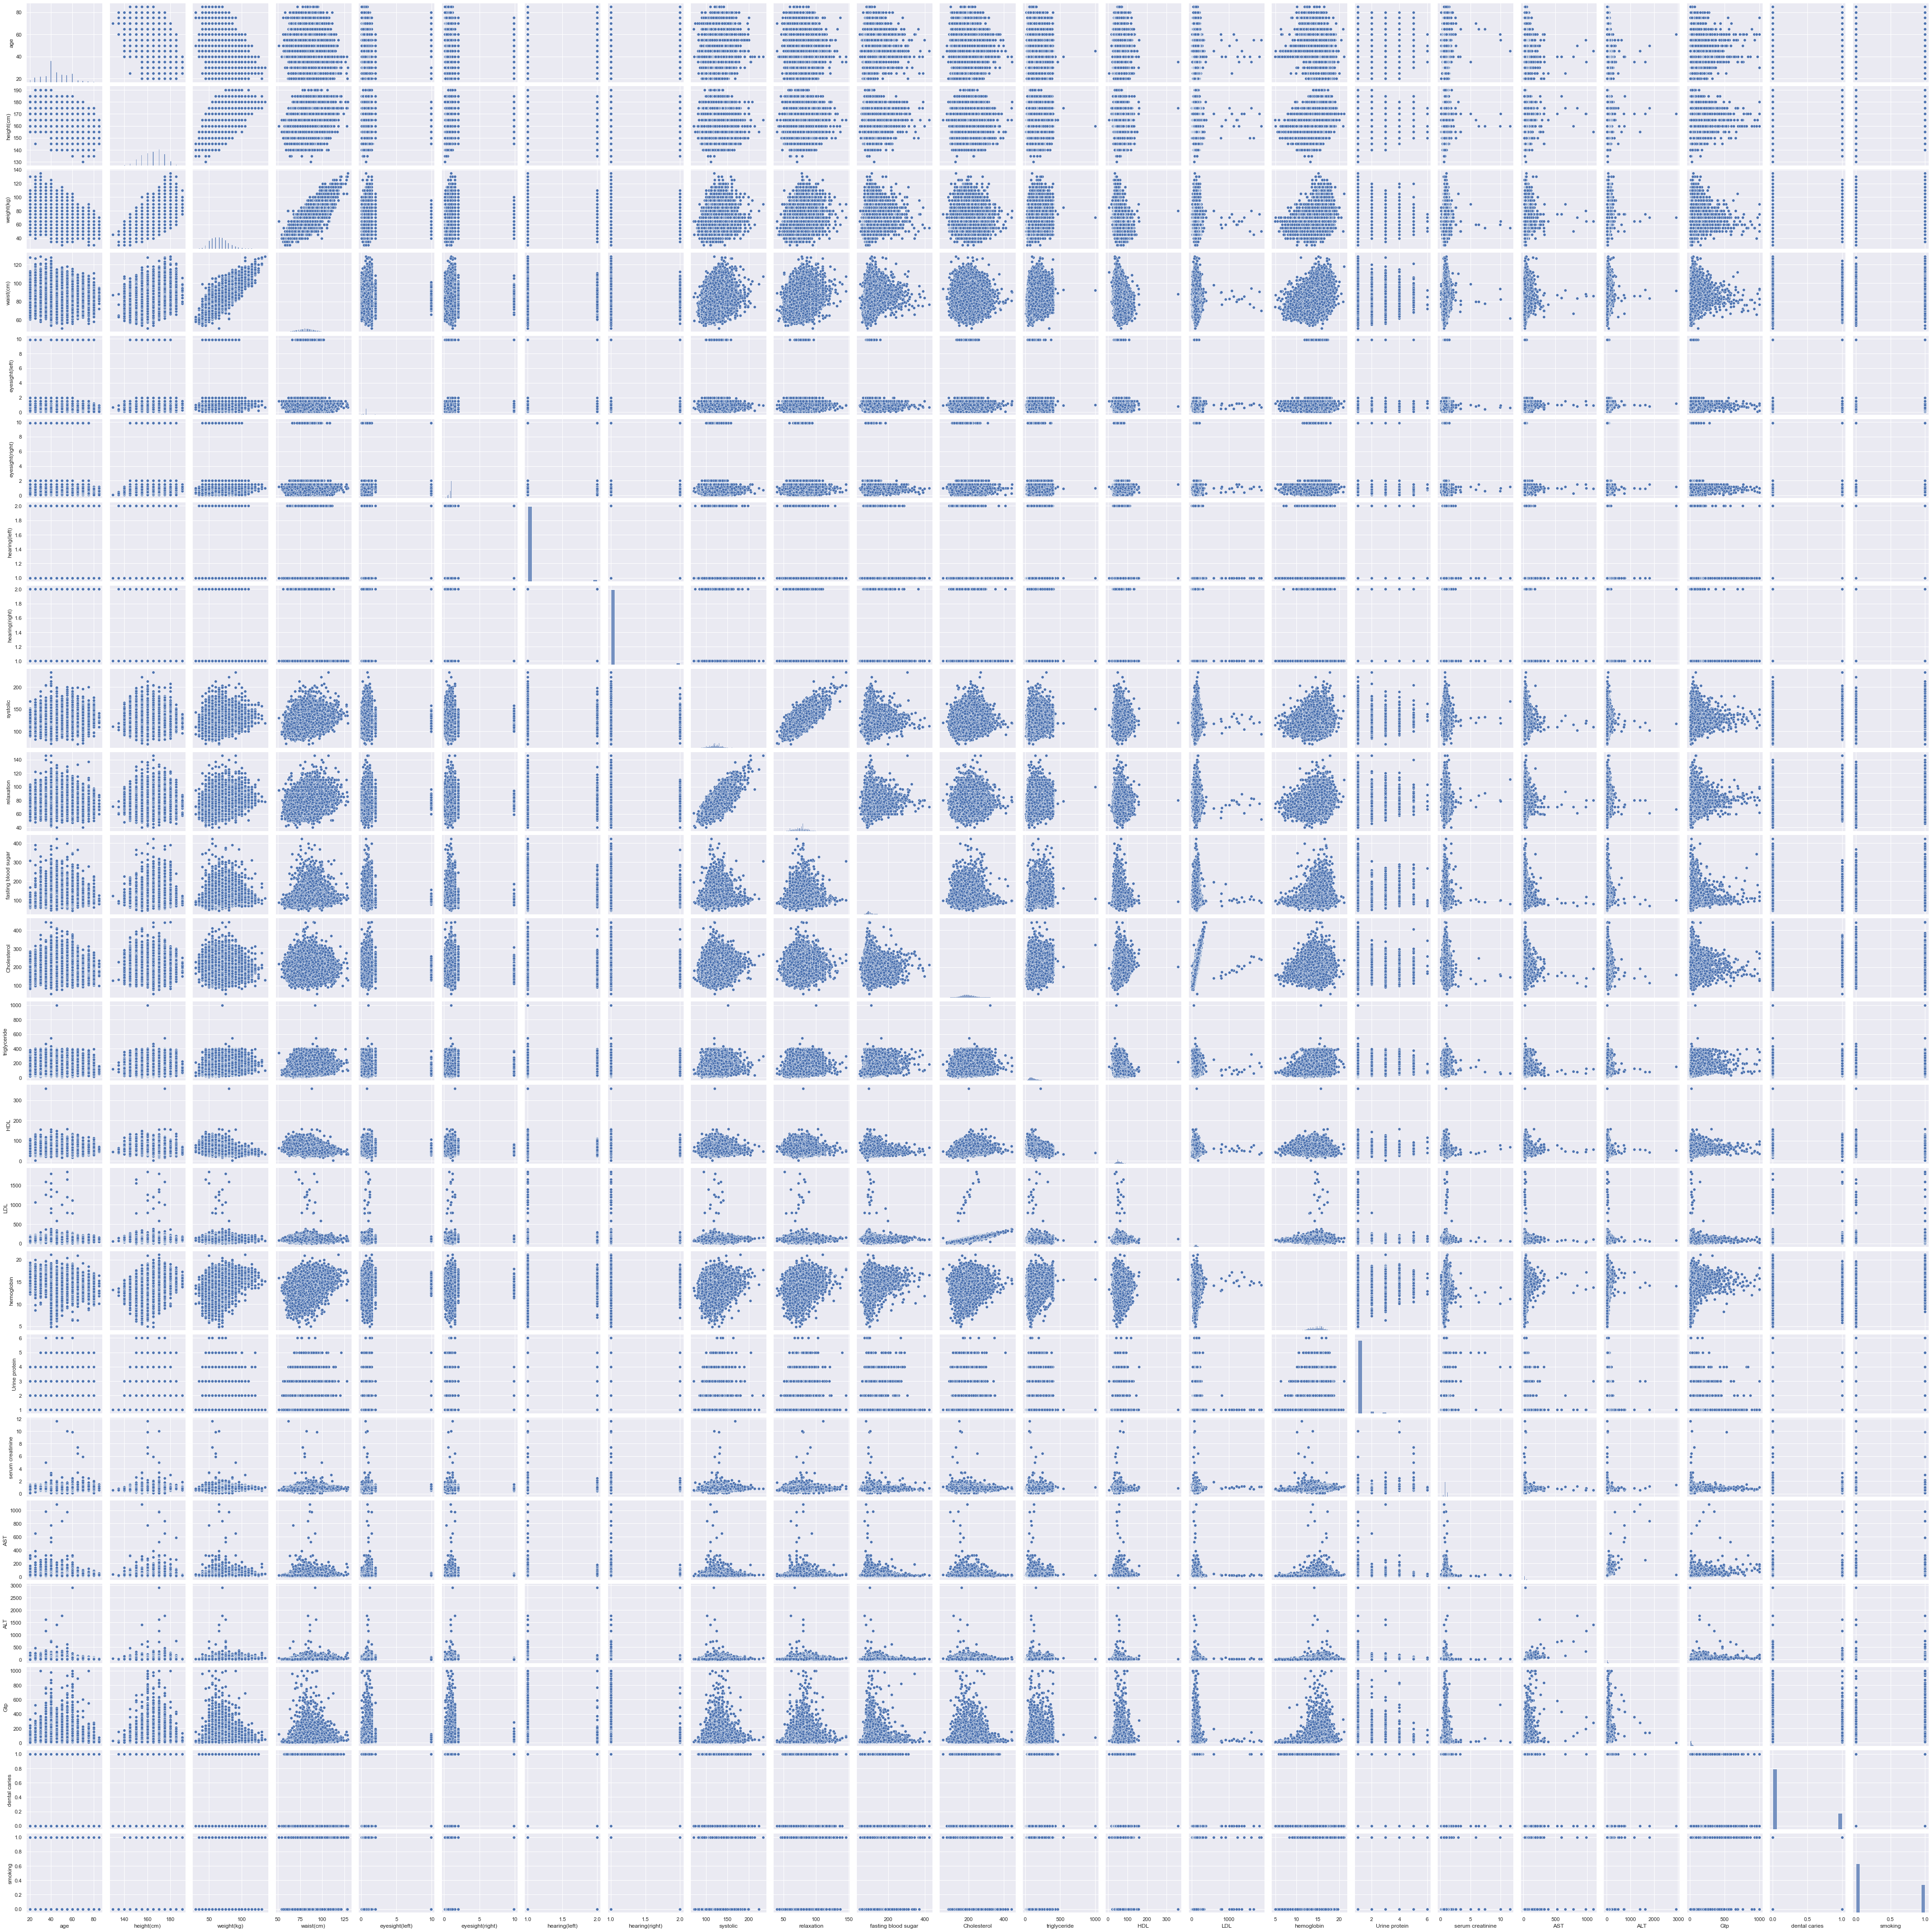

In [128]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [129]:
train.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [130]:
test.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Datatypes in Train and Test DataSet</h2>
</div>


In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16708 entries, 0 to 16707
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  16708 non-null  int64  
 1   height(cm)           16708 non-null  int64  
 2   weight(kg)           16708 non-null  int64  
 3   waist(cm)            16708 non-null  float64
 4   eyesight(left)       16708 non-null  float64
 5   eyesight(right)      16708 non-null  float64
 6   hearing(left)        16708 non-null  int64  
 7   hearing(right)       16708 non-null  int64  
 8   systolic             16708 non-null  int64  
 9   relaxation           16708 non-null  int64  
 10  fasting blood sugar  16708 non-null  int64  
 11  Cholesterol          16708 non-null  int64  
 12  triglyceride         16708 non-null  int64  
 13  HDL                  16708 non-null  int64  
 14  LDL                  16708 non-null  int64  
 15  hemoglobin           16708 non-null 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [203]:
X = train.drop('smoking', axis=1)
y = train['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Logistic Regression</h2>
</div>

Accuracy of Logistic Regression on training set: 0.71
Accuracy of Logistic Regression on test set: 0.72
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.84      0.79      4975
           1       0.64      0.51      0.57      2822

    accuracy                           0.72      7797
   macro avg       0.69      0.67      0.68      7797
weighted avg       0.71      0.72      0.71      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

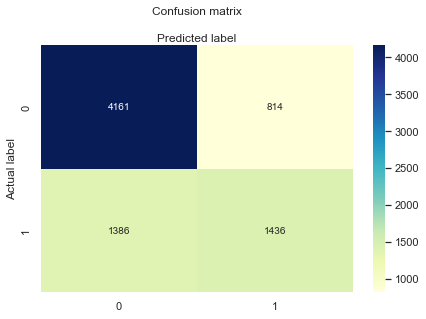

In [210]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model1.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model1.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- Fitting Logistic Regression Model with best Hyperparameters generated by Random Search</h2>
</div>

Accuracy of Logistic Regression on training set: 0.72
Accuracy of Logistic Regression on test set: 0.73
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.81      0.79      4975
           1       0.63      0.57      0.60      2822

    accuracy                           0.73      7797
   macro avg       0.70      0.69      0.70      7797
weighted avg       0.72      0.73      0.72      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

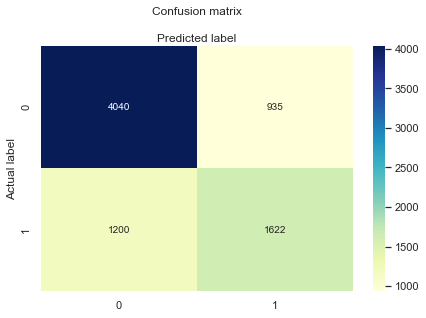

In [211]:
model2 = LogisticRegression(solver = 'newton-cg', penalty = 'none'
                            ,max_iter = 1000
                            ,C = 0.001,random_state=42)
model2.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model2.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model2.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- Fitting Logistic Regression Model with best Hyperparameters generated by Random Search with Balanced Weights</h2>
</div>

Accuracy of Logistic Regression on training set: 0.72
Accuracy of Logistic Regression on test set: 0.72
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.68      0.76      4975
           1       0.58      0.79      0.67      2822

    accuracy                           0.72      7797
   macro avg       0.72      0.74      0.71      7797
weighted avg       0.75      0.72      0.72      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

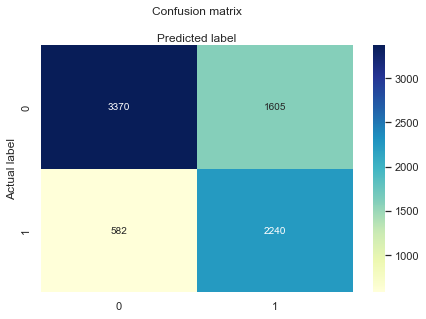

In [212]:
model3 = LogisticRegression(solver = 'newton-cg', penalty = 'none'
                            ,max_iter = 1000, class_weight = 'balanced'
                            ,C=0.001,random_state=42)
model3.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model3.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model3.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Random Forest Classifier</h2>
</div>

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.80
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4975
           1       0.72      0.73      0.73      2822

    accuracy                           0.80      7797
   macro avg       0.78      0.79      0.78      7797
weighted avg       0.80      0.80      0.80      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

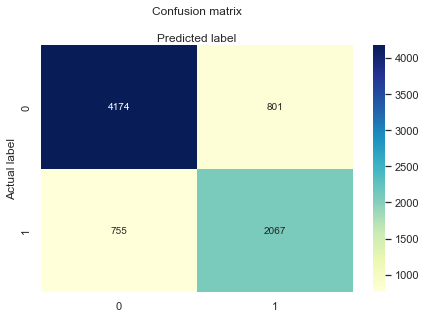

In [213]:
model4 = RandomForestClassifier(random_state=0)
model4.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model4.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model4.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 5- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.80
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4975
           1       0.72      0.73      0.73      2822

    accuracy                           0.80      7797
   macro avg       0.79      0.79      0.79      7797
weighted avg       0.80      0.80      0.80      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

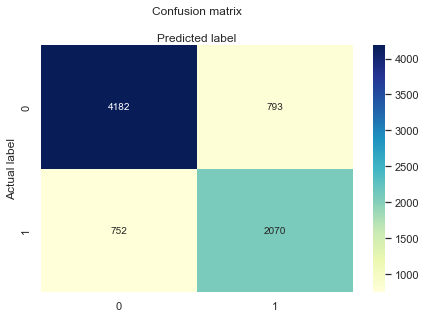

In [255]:
model5 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
model5.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model5.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model5.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model5.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model5.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 6- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search with Balanced Weights</h2>
</div>

Accuracy of Random Forest Classifier on training set: 0.78
Accuracy of Random Forest Classifier on test set: 0.72
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.64      0.75      4975
           1       0.58      0.88      0.70      2822

    accuracy                           0.72      7797
   macro avg       0.74      0.76      0.72      7797
weighted avg       0.78      0.72      0.73      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

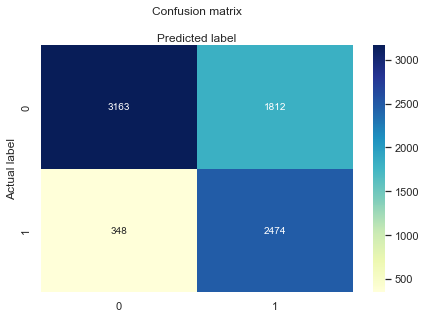

In [215]:
model6 = RandomForestClassifier(n_estimators = 10,min_samples_split = 10
                                ,min_samples_leaf = 3,max_features = 'log2'
                                ,max_depth = 10, bootstrap = False
                                ,class_weight='balanced'
                                ,random_state=0) 
model6.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model6.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model6.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model6.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model6.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 7- Fitting Random Forest Classifier Model with best Hyperparameters generated by Random Search with Actual Class Weights</h2>
</div>

Accuracy of Random Forest Classifier on training set: 0.78
Accuracy of Random Forest Classifier on test set: 0.73
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.64      0.75      4975
           1       0.58      0.88      0.70      2822

    accuracy                           0.73      7797
   macro avg       0.74      0.76      0.73      7797
weighted avg       0.79      0.73      0.73      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

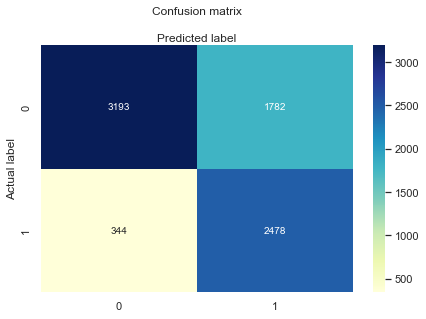

In [216]:
model7 = RandomForestClassifier(n_estimators = 10,min_samples_split = 10
                                ,min_samples_leaf = 3,max_features = 'log2'
                                ,max_depth = 10, bootstrap = False
                                ,class_weight={0: 0.79023757, 1: 1.36136332}
                                ,random_state=0)
model7.fit(X_train,y_train) 
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(model7.score(X_train, y_train)))

print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(model7.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model7.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model7.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 8- LGBM Classifier</h2>
</div>

Accuracy of LGBM Classifier on training set: 0.81
Accuracy of LGBM Classifier on test set: 0.77
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.80      0.81      4975
           1       0.67      0.70      0.68      2822

    accuracy                           0.77      7797
   macro avg       0.75      0.75      0.75      7797
weighted avg       0.77      0.77      0.77      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

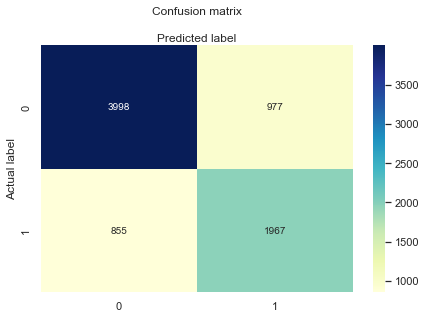

In [217]:
model8 = LGBMClassifier(random_state=0)

model8.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model8.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model8.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model8.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model8.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 9- Fitting LGBM Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

Accuracy of LGBM Classifier on training set: 0.87
Accuracy of LGBM Classifier on test set: 0.77
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4975
           1       0.68      0.71      0.69      2822

    accuracy                           0.77      7797
   macro avg       0.75      0.76      0.76      7797
weighted avg       0.78      0.77      0.77      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

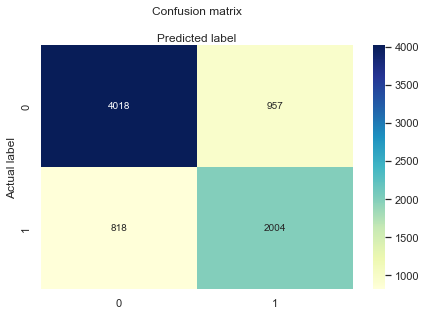

In [218]:
model9 = LGBMClassifier(reg_alpha = 2,num_leaves = 30, n_estimators = 500
                        ,min_child_samples = 40
                        ,max_depth = -1,learning_rate = 0.07
                        ,colsample_bytree = 0.5
                        ,boosting_type = 'gbdt'
                        ,random_state=0)

model9.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model9.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model9.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model9.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model9.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 10- Fitting LGBM Classifier Model with best Hyperparameters generated by Random Search with Actual Class Weights</h2>
</div>

Accuracy of LGBM Classifier on training set: 0.84
Accuracy of LGBM Classifier on test set: 0.76
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.88      0.71      0.79      4975
           1       0.62      0.83      0.71      2822

    accuracy                           0.76      7797
   macro avg       0.75      0.77      0.75      7797
weighted avg       0.79      0.76      0.76      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

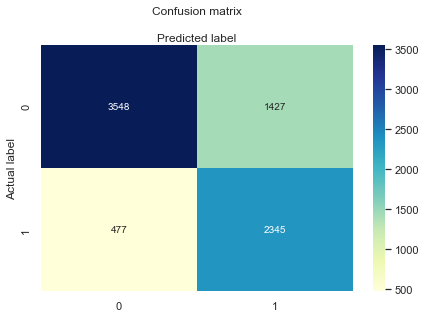

In [219]:
model10 = LGBMClassifier(reg_alpha = 2,num_leaves = 30, n_estimators = 500
                        ,min_child_samples = 40
                        ,max_depth = -1,learning_rate = 0.07
                        ,colsample_bytree = 0.5
                        ,boosting_type = 'gbdt'
                        ,class_weight={0: 0.79023757, 1: 1.36136332}
                         ,random_state=0)

model10.fit(X_train,y_train) 
print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model10.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model10.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model10.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model10.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 11- CatBoost Classifier</h2>
</div>

Accuracy of CatBoost Classifier on training set: 0.84
Accuracy of CatBoost Classifier on test set: 0.77
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4975
           1       0.67      0.70      0.69      2822

    accuracy                           0.77      7797
   macro avg       0.75      0.75      0.75      7797
weighted avg       0.77      0.77      0.77      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

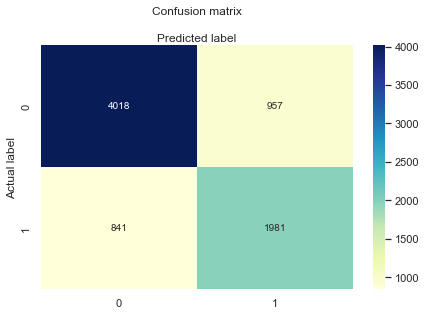

In [220]:
model11 = CatBoostClassifier(random_state=0,logging_level='Silent')

model11.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model11.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model11.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model11.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model11.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 12- Fitting CatBoost Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

Accuracy of CatBoost Classifier on training set: 0.82
Accuracy of CatBoost Classifier on test set: 0.77
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.80      0.81      4975
           1       0.67      0.70      0.68      2822

    accuracy                           0.77      7797
   macro avg       0.75      0.75      0.75      7797
weighted avg       0.77      0.77      0.77      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

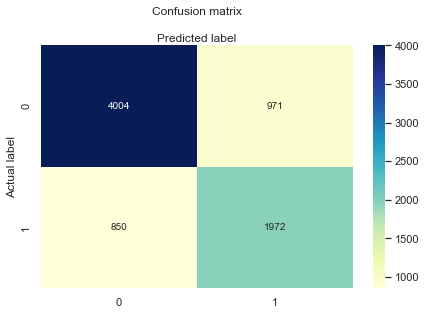

In [221]:
model12 = CatBoostClassifier(depth = 10, iterations = 100
                             ,learning_rate = 0.04
                             ,logging_level='Silent'
                             ,random_state=0) 

model12.fit(X_train,y_train) 
print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model12.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model12.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model12.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model12.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 13- XGB Classifier</h2>
</div>

Accuracy of XGB Classifier on training set: 0.88
Accuracy of XGB Classifier on test set: 0.77
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4975
           1       0.67      0.70      0.69      2822

    accuracy                           0.77      7797
   macro avg       0.75      0.76      0.75      7797
weighted avg       0.77      0.77      0.77      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

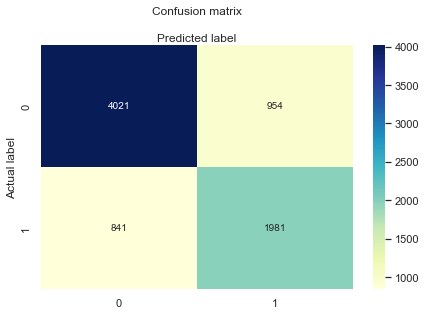

In [222]:
model13 = XGBClassifier(random_state=0)

model13.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model13.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model13.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model13.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model13.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 14- Fitting XGB Classifier Model with best Hyperparameters generated by Random Search</h2>
</div>

Accuracy of XGB Classifier on training set: 0.98
Accuracy of XGB Classifier on test set: 0.79
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.84      0.83      0.84      4975
           1       0.71      0.73      0.72      2822

    accuracy                           0.79      7797
   macro avg       0.77      0.78      0.78      7797
weighted avg       0.79      0.79      0.79      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

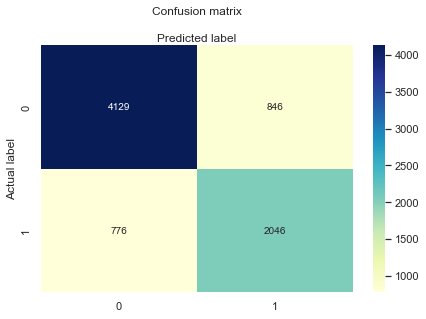

In [223]:
model14 = XGBClassifier(subsample = 0.7999999999999999,n_estimators = 250
                        ,min_child_weight = 5
                        ,max_depth = 10,learning_rate = 0.1
                        ,gamma = 0.1
                        ,random_state=0)

model14.fit(X_train,y_train) 
print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model14.score(X_train, y_train)))

print('Accuracy of XGB Classifier on test set: {:.2f}'
     .format(model14.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model14.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model14.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 15- Linear Support Vector Classification</h2>
</div>

Accuracy of Linear SVC on training set: 0.72
Accuracy of Linear SVC on test set: 0.73
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.81      0.79      4975
           1       0.63      0.58      0.61      2822

    accuracy                           0.73      7797
   macro avg       0.70      0.70      0.70      7797
weighted avg       0.72      0.73      0.72      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

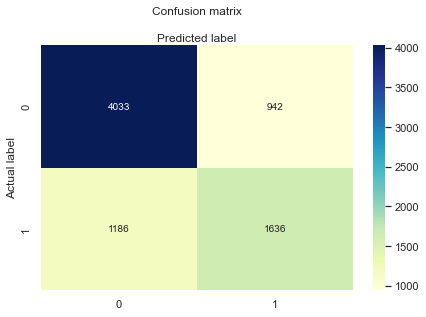

In [224]:
model15 = make_pipeline(StandardScaler(),LinearSVC())

model15.fit(X_train,y_train) 
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(model15.score(X_train, y_train)))

print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(model15.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model15.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model15.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 16- Histogram Gradient Boosting Classification</h2>
</div>

Accuracy of Hist Gradient Boosting Classifier on training set: 0.81
Accuracy of Hist Gradient Boosting Classifier on test set: 0.76
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.80      0.81      4975
           1       0.67      0.69      0.68      2822

    accuracy                           0.76      7797
   macro avg       0.74      0.75      0.75      7797
weighted avg       0.77      0.76      0.76      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

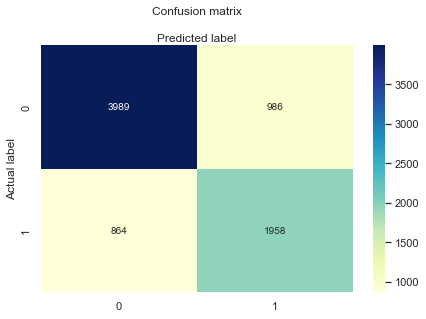

In [225]:
model16 = HistGradientBoostingClassifier(random_state=0)

model16.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Classifier on training set: {:.2f}'
     .format(model16.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Classifier on test set: {:.2f}'
     .format(model16.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model16.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model16.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 17- Fitting Histogram Gradient Boosting Classifier Model with best Hyperparameters generated by Grid Search</h2>
</div>

Accuracy of Hist Gradient Boosting Classifier on training set: 0.85
Accuracy of Hist Gradient Boosting Classifier on test set: 0.77
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4975
           1       0.67      0.71      0.69      2822

    accuracy                           0.77      7797
   macro avg       0.75      0.76      0.75      7797
weighted avg       0.77      0.77      0.77      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

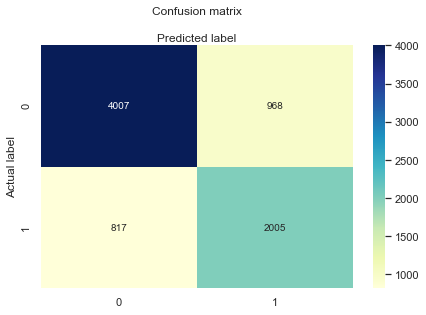

In [226]:
model17 = HistGradientBoostingClassifier(learning_rate = 0.1,max_depth = 10
                                         ,max_iter = 200,min_samples_leaf = 10
                                         ,random_state=0)

model17.fit(X_train,y_train) 
print('Accuracy of Hist Gradient Boosting Classifier on training set: {:.2f}'
     .format(model17.score(X_train, y_train)))

print('Accuracy of Hist Gradient Boosting Classifier on test set: {:.2f}'
     .format(model17.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model17.predict(X_test)),'\n')


print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model17.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 18- MLP Classifier</h2>
</div>

Accuracy of MLP Classifier on training set: 0.74
Accuracy of MLP Classifier on test set: 0.74
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.80      0.78      0.79      4975
           1       0.63      0.66      0.64      2822

    accuracy                           0.74      7797
   macro avg       0.71      0.72      0.72      7797
weighted avg       0.74      0.74      0.74      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

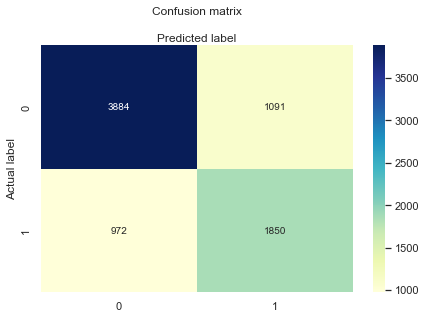

In [227]:
from sklearn.neural_network import MLPClassifier
model18 = MLPClassifier(hidden_layer_sizes=(10, 10)
                        ,max_iter=1000
                        ,random_state=42)

model18.fit(X_train,y_train) 
print('Accuracy of MLP Classifier on training set: {:.2f}'
     .format(model18.score(X_train, y_train)))

print('Accuracy of MLP Classifier on test set: {:.2f}'
     .format(model18.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model18.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model18.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 19- Bagging Classifier</h2>
</div>

Accuracy of Bagging Classifier on training set: 1.00
Accuracy of Bagging Classifier on test set: 0.80
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4975
           1       0.72      0.74      0.73      2822

    accuracy                           0.80      7797
   macro avg       0.79      0.79      0.79      7797
weighted avg       0.80      0.80      0.80      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

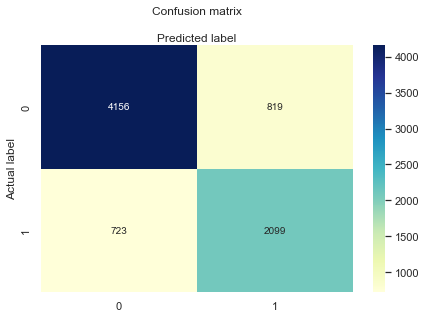

In [228]:
model19 = BaggingClassifier(n_estimators=700)

model19.fit(X_train,y_train) 
print('Accuracy of Bagging Classifier on training set: {:.2f}'
     .format(model19.score(X_train, y_train)))

print('Accuracy of Bagging Classifier on test set: {:.2f}'
     .format(model19.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model19.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model19.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 20- Ensemble Classifier</h2>
</div>

Accuracy of Ensemble Classifier on training set: 0.78
Accuracy of Ensemble Classifier on test set: 0.72
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.90      0.64      0.75      4975
           1       0.58      0.88      0.70      2822

    accuracy                           0.72      7797
   macro avg       0.74      0.76      0.72      7797
weighted avg       0.79      0.72      0.73      7797
 

---------------------------------------------------------------------------------------------------------------------


Text(0.5, 257.44, 'Predicted label')

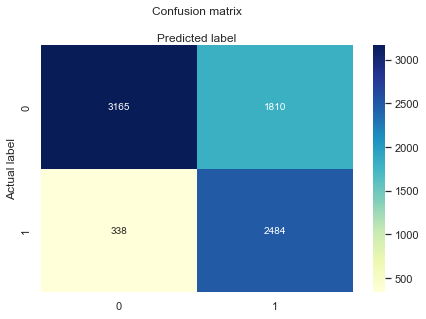

In [229]:
clf1 = model6
clf2 = model7

model20 = VotingClassifier(estimators=[('Model6', clf1)
                                       , ('Model7', clf2)]
                           , voting='soft')
model20.fit(X_train,y_train) 
print('Accuracy of Ensemble Classifier on training set: {:.2f}'
     .format(model20.score(X_train, y_train)))

print('Accuracy of Ensemble Classifier on test set: {:.2f}'
     .format(model20.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n'
      ,classification_report(y_test,model20.predict(X_test)),'\n')

print('-------------'*9)

confusion_matrix = metrics.confusion_matrix(y_test, model20.predict(X_test))
class_names=[0,1] # Represent name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [ ]:
# Import Test data for the prediction of the Target Variable
x = np.array(test) 

# Define a list of models and their corresponding names

models = [ ("model1", model1), ("model2", model2)
          ,("model3", model3), ("model4", model4)
          ,("model5", model5), ("model6", model6)
          ,("model7", model7), ("model8", model8)
          ,("model9", model9), ("model10", model10)
          ,("model11", model11),("model12", model12)
          ,("model13", model13),("model14", model14)
          ,("model15", model15),("model16", model16)
          ,("model17", model17),("model18", model18)
          ,("model19", model19),("model20", model20)]

# Loop through the models and predictions
for i, (model_name, model) in enumerate(models, start=1):

    # Make predictions using the current model
    y_pred = model.predict(x)
    # Create a DataFrame for the prediction

    df = pd.DataFrame({'smoking': y_pred})
    file_path = f'C:\\Users\\AniketBarphe\\Favorites\\AB\\Apnet\\SSP\\M{i}.csv'
    df.to_csv(file_path, index=False)
    #print(f"Saved prediction from {model_name} to {file_path}")

print("Prediction_From_All_Models_are_stored_in_respective_Files!")

In [231]:
# Prediction using Model 1
y_pred1 = model1.predict(x) #F1_Score = 70.5820

# Prediction using Model 2
y_pred2 = model2.predict(x) #F1_Score = 71.7342

# Prediction using Model 3
y_pred3 = model3.predict(x) #F1_Score = 72.1083

# Prediction using Model 4
y_pred4 = model4.predict(x) #F1_Score = 80.3232

# Prediction using Model 5
y_pred5 = model5.predict(x) #F1_Score = 80.237

# Prediction using Model 6
y_pred6 = model6.predict(x) #F1_Score = 72.9762

# Prediction using Model 7
y_pred7 = model7.predict(x) #F1_Score = 72.9911

# Prediction using Model 8
y_pred8 = model8.predict(x) #F1_Score = 76.2831

# Prediction using Model 9
y_pred9 = model9.predict(x) #F1_Score = 77.3754

# Prediction using Model 10
y_pred10 = model10.predict(x) #F1_Score =  76.9863

# Prediction using Model 11
y_pred11 = model11.predict(x) #F1_Score =  76.9714

# Prediction using Model 12
y_pred12 = model12.predict(x) #F1_Score = 76.0137

# Prediction using Model 13
y_pred13 = model13.predict(x) #F1_Score = 76.8966

# Prediction using Model 14
y_pred14 = model14.predict(x) #F1_Score =  79.5151

# Prediction using Model 15
y_pred15 = model15.predict(x) #F1_Score = 71.8689

# Prediction using Model 16
y_pred16 = model16.predict(x) #F1_Score =  76.0586

# Prediction using Model 17
y_pred17 = model17.predict(x) #F1_Score =  76.6571

# Prediction using Model 18
y_pred18 = model18.predict(x) #F1_Score =   72.9762

# Prediction using Model 19
y_pred19 = model19.predict(x) #F1_Score =  80.5326

# Prediction using Model 20
y_pred20 = model20.predict(x) #F1_Score =  73.3502

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [261]:
y_pred = y_pred5
df1=pd.DataFrame(y_pred,columns=['smoking'])
df1.to_csv(r'C:\Users\AniketBarphe\Favorites\AB\Apnet\SSP\Best_Submission_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

**Best Submission F1 Score on Leaderboard:-**  80.237

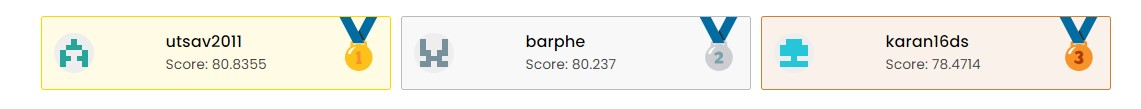

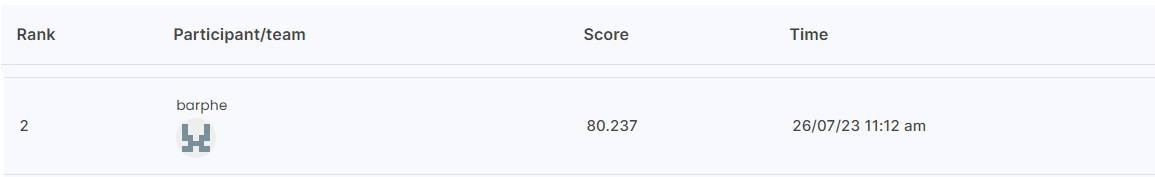

**Competition Link:-** https://aiplanet.com/challenges/320/data-sprint-103-smoker-status-prediction-using-bio-signals-227/leaderboard/practice

**Rank Scored:-** **02nd** 